<a href="https://colab.research.google.com/github/Otabek-Rizayev/AI-Models/blob/main/Colab/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Otabek-Rizayev/AI-Models/main/Data-sets/houses.csv', index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [21]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

In [22]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [23]:
X = housing['size']
y = housing['price']

In [24]:
theta1 = np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X)) ** 2)
theta0 = np.mean(y) - theta1 * np.mean(X)
print(f"Regression Model: y={theta0:.2f}, X={theta1:.2f}")

Regression Model: y=-195.95, X=740.03


In [25]:
X_test = housing.sample(10, random_state=42)['size'].to_numpy()
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"Asl narxi(qiymati): y={y_test.astype(int)}")
print(f"x={X_test.astype(int)}")
y_pred = theta0 + theta1 * X_test
print(f"Prediction(Bashorat): y={y_pred.astype(int)}")

Asl narxi(qiymati): y=[37500 26500 25500 39000 32500 34500 22700 47000 37900 36000]
x=[54 42 36 60 48 68 38 65 52 44]
Prediction(Bashorat): y=[39765 30885 26445 44205 35325 50125 27925 47905 38285 32365]


In [26]:
rmse = np.sqrt(sum((y.sample(10, random_state=42) - y_pred) ** 2) / len(X))
print(f"RMSE: {rmse}")

RMSE: 462.7092240560168


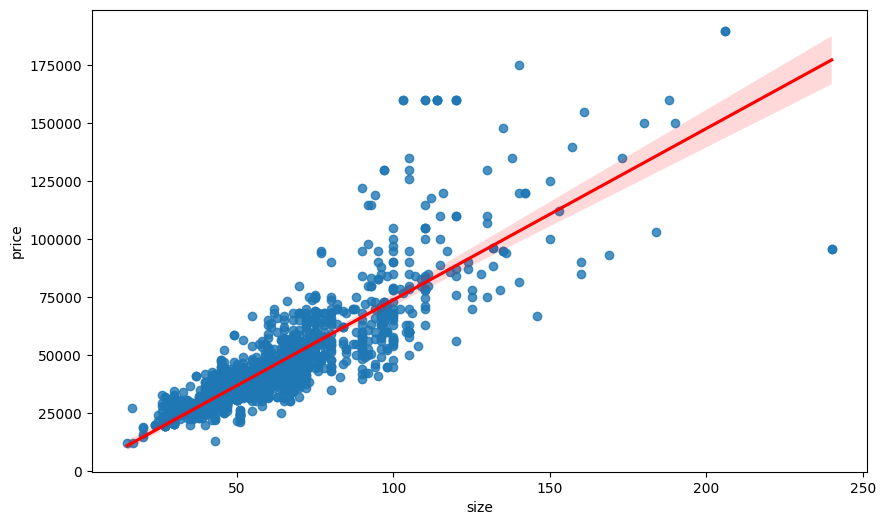

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.regplot(x=X, y=y, line_kws={"color": "red"})
plt.show()